# Introduction

Here, we will continue from session-1 and look into data normalization, feature selection, dimensionality reduction techniques and data visualization. We will load the data we saved at the end of session-1.

# Load packages

In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load previously saved data

In [2]:
adata = sc.read_h5ad('../session-01/data/session_1_adata.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells'
    uns: 'scrublet'

In [4]:
adata.X.data

array([1., 4., 2., ..., 1., 1., 1.], dtype=float32)

In [5]:
adata.X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet
AAACCCAAGCGCCCAT-1,1087,6.992096,2204.0,7.698483,34.437387,44.782214,55.716878,73.366606,52.0,2.359347,0.071849,False
AAACCCAAGGTTCCGC-1,4200,8.343078,20090.0,9.908028,30.751618,43.753111,55.739174,67.819811,1324.0,6.590343,0.019096,False
AAACCCACAGAGTTGG-1,1836,7.515889,5884.0,8.680162,42.641061,52.923182,62.542488,75.254929,633.0,10.757988,0.001666,False
AAACCCACAGGTATGG-1,2216,7.703910,5530.0,8.618124,32.839060,41.681736,51.175407,65.280289,434.0,7.848101,0.006674,False
AAACCCACATAGTCAC-1,1615,7.387709,5106.0,8.538367,41.676459,56.423815,65.648257,78.162946,553.0,10.830396,0.017654,False
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGCGTCGT-1,1336,7.198184,5115.0,8.540128,51.163245,67.565982,74.975562,83.655914,365.0,7.135875,0.136735,False
TTTGTTGGTGTCATGT-1,1331,7.194437,3937.0,8.278428,46.405893,55.956312,65.278131,78.892558,783.0,19.888241,0.002335,False
TTTGTTGGTTTGAACC-1,1401,7.245655,4245.0,8.353733,43.910483,58.186101,67.255595,78.775029,375.0,8.833922,0.008787,False
TTTGTTGTCCAAGCCG-1,1668,7.419980,5602.0,8.631058,45.430203,59.371653,67.832917,79.150303,524.0,9.353803,0.037047,False


In [7]:
adata.var

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mt,n_cells
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,60,0.005183,0.005170,99.490186,61.0,4.127134,False,60
AL669831.5,ENSG00000237491,Gene Expression,GRCh38,679,0.062367,0.060500,94.230606,734.0,6.599871,False,676
LINC00115,ENSG00000225880,Gene Expression,GRCh38,350,0.031269,0.030790,97.026085,368.0,5.910797,False,344
FAM41C,ENSG00000230368,Gene Expression,GRCh38,313,0.027190,0.026827,97.340471,320.0,5.771441,False,313
NOC2L,ENSG00000188976,Gene Expression,GRCh38,2623,0.267907,0.237368,77.712635,3153.0,8.056427,False,2586
...,...,...,...,...,...,...,...,...,...,...,...
MT-CYB,ENSG00000198727,Gene Expression,GRCh38,11757,57.151840,4.063058,0.101963,672620.0,13.418938,True,11167
AC011043.1,ENSG00000276256,Gene Expression,GRCh38,77,0.006882,0.006859,99.345739,81.0,4.406719,False,76
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,239,0.020902,0.020687,97.969241,246.0,5.509388,False,236
AL354822.1,ENSG00000278384,Gene Expression,GRCh38,319,0.028210,0.027819,97.289489,332.0,5.808143,False,313


# Data Normalization

Currently, `adata.X` contains the original unnormalized data. If we execute data normalization function, it will overwrite `adata.X`. So to preserve the original counts, we will first make a copy of `adata.X` and store it in `adata.layers`:

In [8]:
adata.layers['raw_data'] = adata.X.copy()

In [9]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells'
    uns: 'scrublet'
    layers: 'raw_data'

Now that we have made a copy of the original counts, we can go ahead and apply Scanpy's normalization function.

In [10]:
sc.pp.normalize_total(adata, inplace = True)

We can now log transform the data as follows (Note - we did not save normalized data in layers as raw_data because we can always recompute it if needed):

In [11]:
sc.pp.log1p(adata)

In [12]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells'
    uns: 'scrublet', 'log1p'
    layers: 'raw_data'

In [13]:
adata.X.data

array([1.236281 , 2.3768706, 1.772504 , ..., 0.7691906, 0.7691906,
       0.7691906], dtype=float32)

# Highly Variable Genes

In [14]:
sc.pp.highly_variable_genes(adata, layer = 'raw_data', n_top_genes = 4000, flavor = 'seurat_v3')

In [15]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg'
    layers: 'raw_data'

In [16]:
adata.var[['highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm']].head()

,highly_variable,highly_variable_rank,means,variances,variances_norm
AL627309.1,False,NaN,0.005457,0.005606,0.965501
AL669831.5,False,NaN,0.065390,0.072213,0.938249
LINC00115,False,NaN,0.032382,0.035094,0.908259
FAM41C,False,NaN,0.028625,0.029061,0.851198
NOC2L,False,NaN,0.278469,0.314379,0.852090


## Example task for workshop practice session:

As we discussed in the lecture part, this is an unsupervised approach of identifying highly variable genes. However, sometimes the researchers has a list of genes they know are important for their study; and it could be the case that those genes are missed or classified as not highly variable by the unsupervised approach. So it is recommended that you look through the list of identified highly variable genes and add any specific genes that you know are important for the study.

As an exercise for the hands-on part, let's supervise the above approach slightly. For this, let's assume that the researcher knows the following genes are critical for the study and wants to ensure they are included as highly variable genes:

CD4, CD8A, CD3E, MS4A1, IL1B, SELL, IL7R, PDGFB, KLF2, KLF3, GATA3.

** Note: This is just an example exercise in how to supervise the list of HVG. The genes above may or may not have actual use for the data you are looking at. Please do not consider this as a recommended list of genes for other scenarios.

1) Check if the above genes are included as highly variable or not (Solution provided at the end of the notebook)

2) For the genes that are currently "False" in highly_variable, set them to true (Solution provided at the end of the notebook)

# Dimensionality reduction: PCA

scRNA-seq attempts to measure the mRNA transcripts of all the genes (~20,000) at single-cell level resolution resulting in a high-dimensional data. The cells represent the samples while the genes represent the features or dimensions of the data. These features/dimensions define the phenotype of each single cell. A cellular phenotype vector points to the location of a cell in a high-dimensional space whose each axis is represented by each of the measured features (genes).

Meanwhile, we know that the genes and their products inside cells form modules, a result of genes being co-regulated. The modular and co-regulatory structure of gene interaction means that a typical scRNA-seq data displays correlation structure among groups of genes. Thus, we are capturing redundant information by measuring all genes from a single cell. Put differently, there are only a few key variables (possibly latent) that are driving the underlying biological process. One consequence of this is that the cellular phenotype space is really a low-dimensional object embedded onto a high-dimensional space, i.e. the biological system really has few free variables but is projected onto a space of thousands of features. We call the low-dimensional object the data manifold. It refers to the true structure of the data irrespective of how it is embedded; and understanding the manifold holds the key to uncovering the underlying biology. The notion of dimensionality reduction is thus to extract those few meaningful dimensions that are reflective of the true underlying biological process.

Futhermore, performing dimensionality reduction on the data reduces the number of dimensions, so it has an added advantage of speeding-up computation (especially when dealing with millions of cells).

PCA (Principal Component Analysis) is the most popular dimensionality reduction algorithms in single-cell data analysis. In short, PCA takes in a high-dimensional data as input and outputs a transformed data with the same number of samples (cells) but with reduced number of dimensions such that the recovered dimensions represent directions of highest variances in the original data.

In [17]:
sc.pp.pca(adata, n_comps=100, use_highly_variable=True)

/Users/chunj/miniconda3/envs/scgw_2/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:227: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(


In [18]:
sc.pp.pca(adata, n_comps=100, mask_var="highly_variable")

A brief explanation of the code above:

We provide adata as an input to the method. As with any other Scanpy method, since we do not specify anything else, the PCA is run on adata.X. Now, we recall that adata.X holds the log-normalized data. Remember, it is crucial that you run PCA on your normalized data (which for the sake of this example notebook is median library size normalization + log transformation).

Second, we specify n_comps = 100, indicating that we are interested only in the top 100 components.

Third, we specify use_highly_variable = True which ensures that PCA is computed only on the highly variable genes.

In [19]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_data'

## Outputs of PCA: 1) Principal components

In [20]:
adata.obsm['X_pca']

array([[-5.426295  , -3.0341544 , -0.7002578 , ..., -1.1516687 ,
         0.6743162 ,  0.4010247 ],
       [ 8.414614  ,  2.9605992 ,  2.275366  , ..., -0.02954981,
         0.01791802,  0.01839756],
       [10.865366  , -2.6142423 , -1.6520052 , ..., -0.26563245,
        -0.47480863,  0.18137462],
       ...,
       [-6.4528856 , -3.200836  ,  1.4139478 , ...,  0.3401363 ,
         0.7957287 , -0.06144726],
       [-7.0115523 , -2.8626943 , -1.2263365 , ..., -0.11659332,
         1.014805  ,  0.46843082],
       [-7.077916  , -2.4047182 , -4.014158  , ..., -0.4773118 ,
        -0.04582719, -0.2944977 ]], dtype=float32)

In [21]:
adata.obsm['X_pca'].shape

(11179, 100)

## Outputs of PCA: 2) PCA loadings

In [22]:
adata.varm['PCs']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
adata.varm['PCs'].shape

(13613, 100)

## Outputs of PCA: 3) Variance exaplained by each component

In [24]:
adata.uns['pca']

{'params': {'zero_center': True,
  'use_highly_variable': True,
  'mask_var': 'highly_variable'},
 'variance': array([70.113945  , 20.055138  ,  9.526252  ,  7.5601397 ,  5.1505413 ,
         2.8870633 ,  2.4078414 ,  1.6710541 ,  1.5392636 ,  1.3138819 ,
         1.2079791 ,  0.94266045,  0.9165316 ,  0.8606236 ,  0.8161515 ,
         0.74493706,  0.6719839 ,  0.62615764,  0.5961985 ,  0.5447303 ,
         0.52845   ,  0.52264315,  0.50670326,  0.48710752,  0.4768814 ,
         0.4628485 ,  0.44593742,  0.43786842,  0.41327003,  0.40888226,
         0.40082505,  0.39140683,  0.38831818,  0.37728494,  0.37167534,
         0.3708162 ,  0.36387327,  0.36000934,  0.3562734 ,  0.35314834,
         0.34598047,  0.3456392 ,  0.34024975,  0.33797356,  0.33607212,
         0.33146086,  0.33041075,  0.32511008,  0.32070294,  0.31872886,
         0.31726584,  0.31103405,  0.3107008 ,  0.3092111 ,  0.3056471 ,
         0.30377597,  0.30136964,  0.30122656,  0.2993113 ,  0.2973967 ,
         0.296

## Choosing "optimal number of components"

To choose the optimal number of principal components, we can visualize the cumulative variance explained:

Text(0, 0.5, '% Variance Explained')

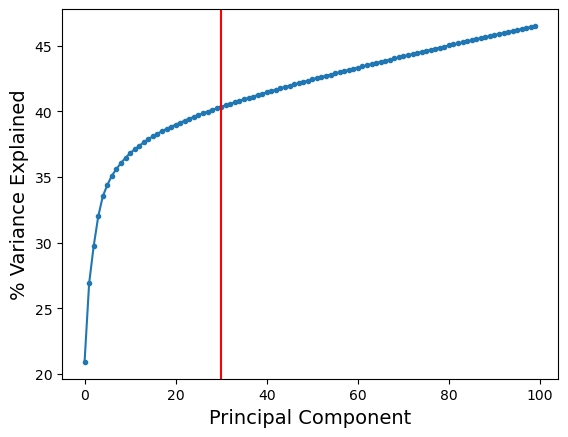

In [25]:
plt.plot(range(len(adata.uns['pca']['variance_ratio'])), np.cumsum(adata.uns['pca']['variance_ratio']) * 100, '.-')
plt.axvline(30, color = 'r')
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('% Variance Explained', fontsize = 14)

As we can see, the increase in variance explained is minimal after about 30 components (as indicated by the red line). So, it is reasonable to perform downstream analysis using 30 principal components.

One can argue that it might be sufficient to choose 20 or 25 principal components based on our argument above. But we recommend to be slightly conservative and err on the side of choosing slightly more principal components. However, since there is no absolute way to establish the right number of components, we strongly recommend that you consider evaluating consistency of downstream results (clustering or trajectories) by altering the number of principal components slightly around the chosen value. In the above example, you can see how downstream results change if you alter the number of principal components between 20 to 50.

For now, we will proceed with 30 components.

In [26]:
adata.obsm['X_pca'] = adata.obsm['X_pca'][:, 0:30]

In [27]:
adata.obsm['X_pca'].shape

(11179, 30)

Similarly, we want to update the loadings `adata.uns['loadings']` and `adata.varm['PCs']` to reflect only the top 30 principal components.

In [28]:
adata.varm['PCs'] = adata.varm['PCs'][:, 0:30]

## Note: Genes-Loadings connection

We can use the loadings to identify the most influential genes onto each of the PCA.

We will sort the gene names by their loadings for the top 30 PCA. First let's create a pandas dataframe of PCA loadings and the corresponding highly variable genes.

In [29]:
df_loadings = pd.DataFrame(adata.varm['PCs'], 
                           index = adata.var.index, 
                           columns = ['PC-' + str(j) for j in range(30)])

In [30]:
df_loadings.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26,PC-27,PC-28,PC-29
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL669831.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC00115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM41C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NOC2L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we ran PCA on HVG, let's make sure that we look at the loadings specific to HVG only. For this we will only consider genes in the HVG.

In [31]:
df_loadings_hvg = df_loadings.loc[adata.var_names[adata.var['highly_variable']]]

In [32]:
df_loadings_hvg

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26,PC-27,PC-28,PC-29
AL645608.8,0.000287,0.000036,0.000416,-6.174785e-07,-0.002050,-0.001986,0.001410,0.000901,0.000964,0.000673,...,0.000181,-0.000583,-0.000224,0.000222,0.000054,-0.000085,0.000145,0.000219,-1.833555e-08,-0.000492
HES4,0.004069,0.001470,0.007436,-3.910107e-04,-0.037510,-0.036385,0.027415,0.022852,0.019982,0.007941,...,0.000907,-0.006102,-0.004417,0.000848,0.007583,0.001954,0.001389,-0.001826,-2.297168e-03,-0.004563
ISG15,-0.005218,-0.011666,0.010687,-1.609132e-02,-0.028054,-0.002405,0.018023,0.001590,-0.018351,0.005416,...,-0.020415,-0.084467,-0.045929,0.183432,-0.098539,0.043766,-0.083468,0.052630,-9.947112e-02,0.039000
TNFRSF18,-0.003370,-0.004771,0.010426,-2.655859e-03,0.000348,0.007535,0.001476,0.017646,-0.006566,-0.008567,...,0.003283,-0.007343,0.005353,0.008379,-0.013021,-0.002001,-0.002020,0.000946,-7.396088e-03,-0.013635
TNFRSF4,-0.004157,-0.006351,-0.005728,-4.690630e-03,-0.008668,0.014845,0.004537,0.026253,-0.012184,-0.022049,...,0.005157,-0.007186,0.011681,0.001748,-0.001132,-0.013048,-0.002826,-0.004725,1.157626e-03,-0.009294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COL6A2,-0.004656,-0.008198,0.012540,-2.856016e-03,0.005580,0.004953,0.012066,-0.013336,0.009069,0.009099,...,0.008619,0.005122,0.006728,-0.002823,-0.001793,0.000742,-0.003943,0.006961,2.297904e-03,-0.001001
MCM3AP-AS1,-0.001390,0.000156,0.001580,-8.165537e-04,0.000638,-0.002428,-0.004319,0.001797,-0.002553,-0.001740,...,-0.000762,-0.001179,-0.000239,-0.002628,0.000080,-0.001804,-0.003509,0.003482,-1.655667e-03,0.000984
C21orf58,-0.000808,-0.000055,0.000463,1.412586e-03,-0.000025,0.000005,-0.002042,0.000730,-0.001047,-0.003072,...,-0.002117,-0.005894,-0.001565,-0.002193,0.001622,-0.000740,-0.003418,0.000250,6.469046e-03,-0.001339
S100B,-0.007406,-0.011837,0.010486,-4.322249e-03,0.004284,0.004417,0.014358,-0.037625,0.022752,0.053771,...,0.001152,0.013660,0.009518,-0.038524,-0.048876,-0.003164,-0.014344,0.045384,-2.252854e-02,-0.002498


We can now sort the dataframe constructed above for any particular PCA.

A note on the sign of the loadings: Since both the positive and negative extreme values of each principal components hold equal interpretive value, it stands to reason that we want to look at the absolute value of the loadings. Basically, we want to know which genes are contributing the most to each PCs.

In [33]:
np.abs(df_loadings_hvg).sort_values(by = 'PC-0', ascending = False)['PC-0']

S100A9        2.195188e-01
LYZ           2.010271e-01
S100A8        2.005151e-01
CTSS          1.359293e-01
CST3          1.288622e-01
                  ...     
AC004846.1    2.324050e-06
CSPP1         1.173586e-06
AC093788.1    8.985527e-07
AL139289.2    2.721196e-07
AC108463.3    1.705488e-07
Name: PC-0, Length: 4000, dtype: float64

As we can see, the first principal component is dominated by S100A9, LYZ, S100A8, CTSS, CST3  etc., which are certain myeloid markers. This indicates that the most variance in the data is driven by myeloid specific genes.

Whether these genes are relevant/important for your study is something you will have to decide. Why might we want to study the loadings? The reason is sometimes we notice that some of the principal components are driven by the expression of mitochondrial genes or ribosomal genes. And depending on the question you are trying to answer it might be beneficial to remove the effect of such genes. This way you can identify if the principal components are being influenced by these nuisance genes and if you need to adjust your set of hvg (for example remove mitochondrial genes or ribosomal genes from the list of hvg or add some new set of context specific genes) for downstream computation.

In [34]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_data'

## Example task for workshop practice session: 

1) Visualize the first two principal components and color by ['LYZ', 'MS4A1', 'CD3E', 'NKG7', 'pct_counts_mt', 'log1p_total_counts']. Hint: use sc.pl.pca (Solution at the end of the notebook)

# Graph representation of data

As we have mentioned, cellular phenotype space is modeled as a low-dimensional object (called the data manifold) embedded in a high-dimensional space. The expression pattern of genes define the manifold structure. So cells with similar expression profiles are close to each other on the manifold. In other words, the local neighborhood of each cell on the manifold consists of similar cells. This is an important property that must be satisified by any method to accurately capture the structure of the manifold (such as for visualization). In addition, the manifold only depends on the connectivity of the data points - defined via pairwise distances - and not on how the points are arranged in space. Therefore, quantifying cell-cell distance is important to study the manifold structure of the data.

In the context of single-cell biology, the data manifold is a characterization of the available space of phenotypes for any cell in that context. Exploring the manifold is therefore equivalent to exploring the possible cellular states, and any defect/perturbation in the molecular processes should reflect as a change in the phenotype landscape. This deviation from normal expression would reflect as a change in characteristics of the data manifold, such as volume or variance or regions of occupancy, analyzing which can help us understand the cause and consequences of the changes.

Understanding the manifold of a high-dimensional data is a problem that pervades several disciplines. As a result, many methods have been proposed to tackle this problem. It is easier to obtain the structure if the underlying manifold is linear - that is, the observed features can be written as a linear combination of the latent variables. Linear methods such as Principal Component Analysis (PCA), discussed above, have been successfully applied in such cases. However, in scRNA-seq data, genes often display non-linear association. The non-linearity is a result of the measured genes themselves being a non-linear combination of the latent variables driving the process, which is in turn a result of the cascades of non-linear interactions, checkpoints and feedback mechanisms a cell has in place. Thus, characterization of the manifold requires us to involve methods that take into account the non-linearity present in single-cell data.

To tackle the issue of non-linearity, we aim to characterize the data manifold by first analyzing data locally around every cell, and then combining them. We assume that around each cell, the local neighborhood is roughly linear (or Euclidean), so we will apply linear methods locally and aggregate to get the total picture of the manifold. This notion of analyzing data to characterize the underlying manifold has proven beneficial in single-cell data analysis. From a mathematical point of view, graphs are the perfect tools designed for this.

A graph is defined as a set G = {V,E,W} consisting of a set of nodes or vertices V, a set of edges E connecting all or some of the vertices and weights W assigned to each of the edges. In the graph representation of single-cell data, each cell is a vertex or node in the graph, two cells are connected if they are similar to each other and the weight between them quantifies similarity between them. The similarity between two cells can be obtained by measuring the distance between them. The choice of distance metric, however, is context dependent but due to its ease and useful properties, Euclidean distance is the preferred choice in the single-cell field. The manifold is congruent to a Euclidean space locally around any given point so, it is sensible to use Euclidean distances to compute similarity in the small neighborhood. Typically, for every cell we first find the `k` nearest neighbors (typically `k` is set to < 1% of the total number of cells profiled) based on Euclidean distance, which will comprise the local neighborhood. Each cell is thus connected to its `k` nearest neighbors by an edge and the constructed graph (called the k-nearest neighbor graph) approximates the underlying manifold. The phenotypic distance between any two cells on such graph is then defined by geodesics along the graph, which more accurately captures biological differences between cells.

Majority of the visualization, clustering and trajectory inference tools build on top of the above constructed graph. While the thus constructed graph may need to be further adjusted to account for the inherent noise in the data it forms the backbone of most of the tools we will discuss henceforth. We use Scanpy's inbuilt method to construct graph:

API for Scanpy kNN graph construction: https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pp.neighbors.html

In [35]:
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca', metric='euclidean')

/Users/chunj/miniconda3/envs/scgw_2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_data'
    obsp: 'distances', 'connectivities'

# Data visualization: UMAP

Uniform Manifold Approximation and Projection (UMAP) has been applied to visualize and analyze sc-RNAseq data. In summary, UMAP uses the graph we built above and tries to arrange data points on a low-dimensional space (typically in 2D) such that the cross-entropy of the high-dimensional graph weights and low-dimensional graph weights is minimized. The author of UMAP has written a beautiful exposition on how UMAP works, which can be found here: https://bit.ly/2qGhBkk.

API for UMAP in Scanpy: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.umap.html

In [37]:
sc.tl.umap(adata)

In [38]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_data'
    obsp: 'distances', 'connectivities'

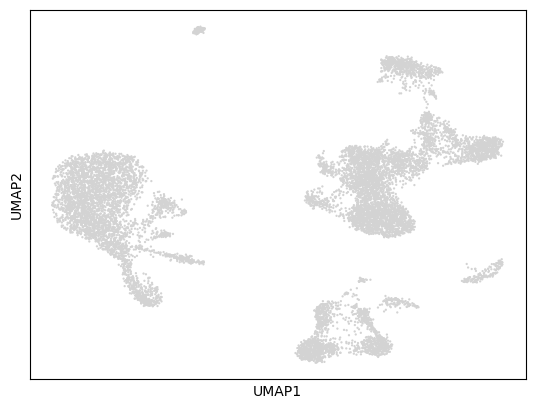

In [39]:
sc.pl.umap(adata)

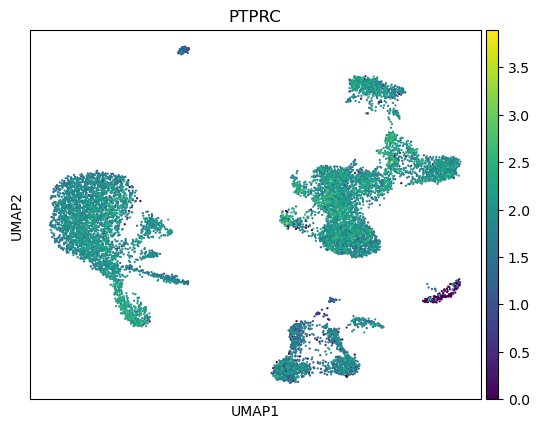

In [40]:
sc.pl.umap(adata, color = 'PTPRC')

## Example task for workshop practice session:

1) Using UMAP's API, plot the UMAP of the data and color by % mito, log1p_total_counts, gene CD3E, gene PTPRC, gene MS4A1, predicted_doublet and doublet_score.

2) To compute UMAP, there are a few parameters at play, importantly: number of principal components and number of nearest neighbors. Let's see how UMAP changes for various values of principal components and nearest neighbors. To evaluate consistency of UMAP to various values of these parameters, we will fix one and vary the other. 

    A) To begin, fix number of nearest neighbors to 30 and vary number of principal components as [10, 30, 50, 70, 200]. How does the UMAP look for these values? Please comment. 

    B) Second, fix the number of principal components to 30 and vary the number of nearest neighbors as [10, 20, 30, 40, 50, 100, 200]. How does the UMAP look for these values? Please comment.

Solution provided at the end of this notebook below.

In [41]:
# First make a copy of adata, so we do not overwrite it
adata_copy = adata.copy()

# Save for later

In [42]:
os.makedirs("./data", exist_ok=True)

In [43]:
adata.write_h5ad('./data/data_from_session_2.h5ad')

# Solutions to example tasks above

1) Check if the above genes are included as highly variable or not (Solution provided at the end of the notebook)

In [44]:
genes = ['CD4', 'CD8A', 'CD3E', 'MS4A1', 'IL1B', 'SELL', 'IL7R', 'PDGFB', 'KLF2', 'KLF3', 'GATA3']
adata.var.loc[genes]

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mt,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
CD4,ENSG00000010610,Gene Expression,GRCh38,4097,0.694282,0.527259,65.188206,8171.0,9.008469,False,4071,True,1049.0,0.728151,1.684993,1.350603
CD8A,ENSG00000153563,Gene Expression,GRCh38,1524,0.323987,0.280647,87.050726,3813.0,8.246434,False,1509,True,255.0,0.338939,1.164677,2.499988
CD3E,ENSG00000198851,Gene Expression,GRCh38,5399,1.555017,0.938059,54.125244,18301.0,9.814766,False,5341,True,1588.0,1.629842,5.099149,1.187874
MS4A1,ENSG00000156738,Gene Expression,GRCh38,2184,0.999915,0.693105,81.442773,11768.0,9.373224,False,2134,True,115.0,1.041059,8.916815,4.241293
IL1B,ENSG00000125538,Gene Expression,GRCh38,2266,0.862350,0.621839,80.746028,10149.0,9.225229,False,2242,True,106.0,0.902138,7.603591,4.484661
SELL,ENSG00000188404,Gene Expression,GRCh38,7076,1.631490,0.967550,39.875945,19201.0,9.862770,False,6999,False,NaN,1.707756,4.505299,0.971152
IL7R,ENSG00000168685,Gene Expression,GRCh38,4878,2.927012,1.367879,58.552128,34448.0,10.447235,False,4756,True,291.0,3.058592,28.701970,2.322188
PDGFB,ENSG00000100311,Gene Expression,GRCh38,79,0.006882,0.006859,99.328745,81.0,4.406719,False,77,False,NaN,0.007067,0.007375,0.940512
KLF2,ENSG00000127528,Gene Expression,GRCh38,10739,5.814683,1.919079,8.751806,68433.0,11.133625,False,10500,False,NaN,6.074962,22.943208,0.571552
KLF3,ENSG00000109787,Gene Expression,GRCh38,4355,0.570312,0.451274,62.996006,6712.0,8.811801,False,4307,False,NaN,0.594597,0.914539,0.965323


2) For the genes that are currently "False" in highly_variable, set them to true (Solution provided at the end of the notebook)

In [45]:
adata.var.loc[['SELL', 'PDGFB', 'KLF2', 'KLF3'], 'highly_variable'] = True

In [46]:
adata.var.loc[genes]

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mt,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
CD4,ENSG00000010610,Gene Expression,GRCh38,4097,0.694282,0.527259,65.188206,8171.0,9.008469,False,4071,True,1049.0,0.728151,1.684993,1.350603
CD8A,ENSG00000153563,Gene Expression,GRCh38,1524,0.323987,0.280647,87.050726,3813.0,8.246434,False,1509,True,255.0,0.338939,1.164677,2.499988
CD3E,ENSG00000198851,Gene Expression,GRCh38,5399,1.555017,0.938059,54.125244,18301.0,9.814766,False,5341,True,1588.0,1.629842,5.099149,1.187874
MS4A1,ENSG00000156738,Gene Expression,GRCh38,2184,0.999915,0.693105,81.442773,11768.0,9.373224,False,2134,True,115.0,1.041059,8.916815,4.241293
IL1B,ENSG00000125538,Gene Expression,GRCh38,2266,0.862350,0.621839,80.746028,10149.0,9.225229,False,2242,True,106.0,0.902138,7.603591,4.484661
SELL,ENSG00000188404,Gene Expression,GRCh38,7076,1.631490,0.967550,39.875945,19201.0,9.862770,False,6999,True,NaN,1.707756,4.505299,0.971152
IL7R,ENSG00000168685,Gene Expression,GRCh38,4878,2.927012,1.367879,58.552128,34448.0,10.447235,False,4756,True,291.0,3.058592,28.701970,2.322188
PDGFB,ENSG00000100311,Gene Expression,GRCh38,79,0.006882,0.006859,99.328745,81.0,4.406719,False,77,True,NaN,0.007067,0.007375,0.940512
KLF2,ENSG00000127528,Gene Expression,GRCh38,10739,5.814683,1.919079,8.751806,68433.0,11.133625,False,10500,True,NaN,6.074962,22.943208,0.571552
KLF3,ENSG00000109787,Gene Expression,GRCh38,4355,0.570312,0.451274,62.996006,6712.0,8.811801,False,4307,True,NaN,0.594597,0.914539,0.965323


Visualize the first two principal components and color by ['LYZ', 'MS4A1', 'CD3E', 'NKG7', 'pct_counts_mt', 'log1p_total_counts'].

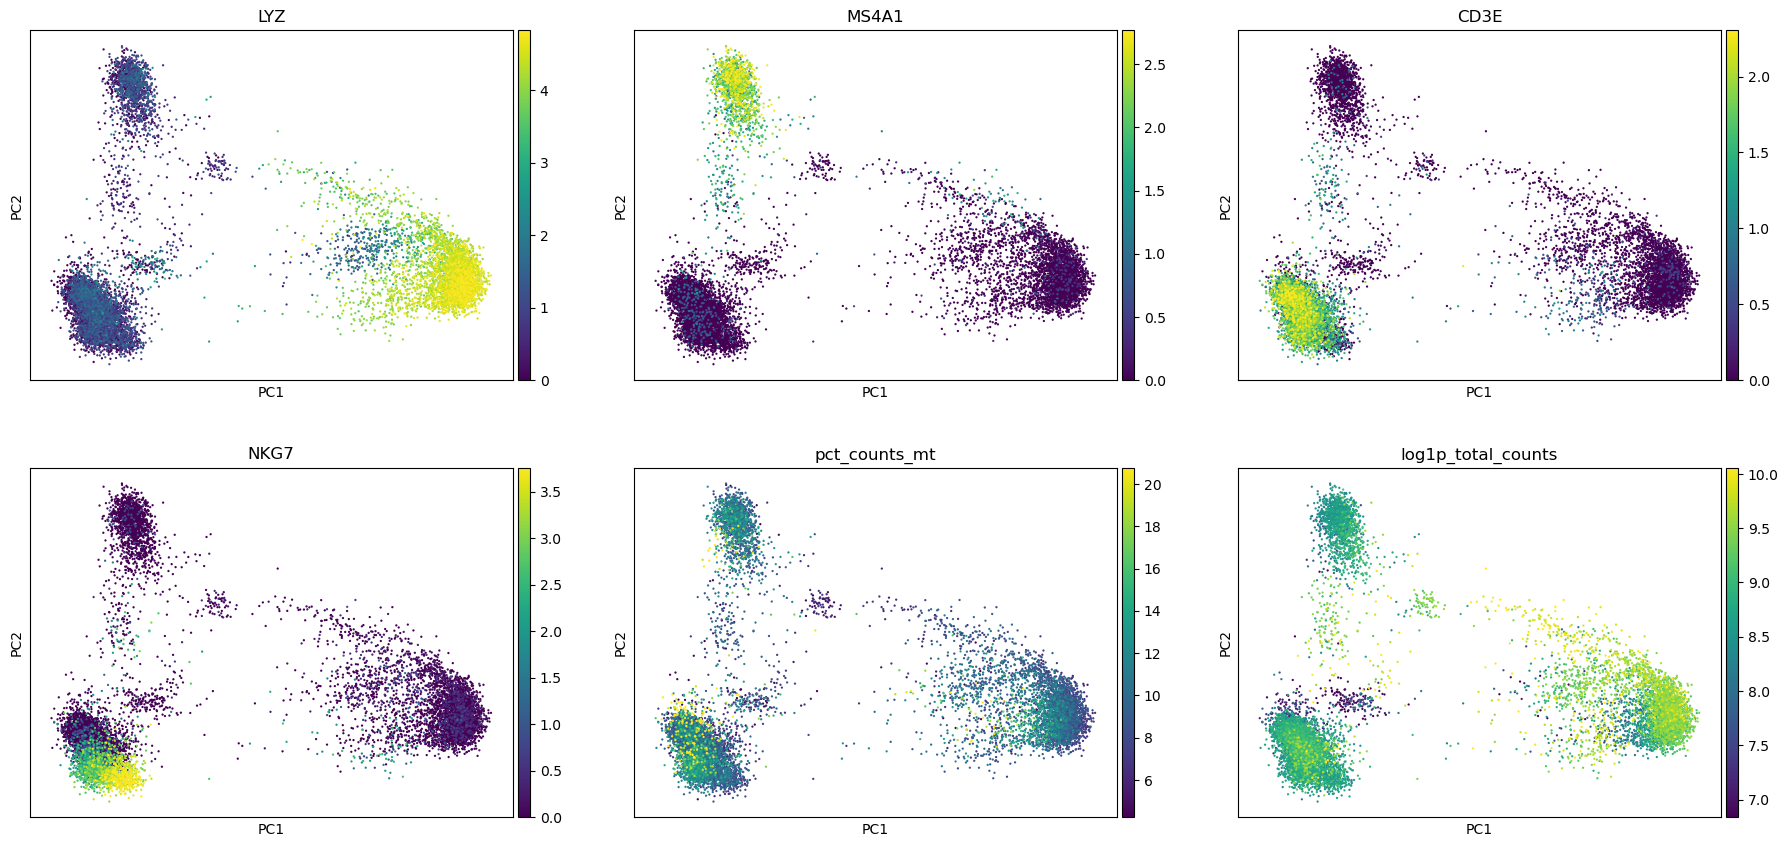

In [47]:
sc.pl.pca(adata, color = ['LYZ', 'MS4A1', 'CD3E', 'NKG7', 'pct_counts_mt', 'log1p_total_counts'], 
          ncols = 3, vmin = 'p1', vmax = 'p99')

Using UMAP's API, plot the UMAP of the data and color by % mito, log1p_total_counts, gene CD3E, gene PTPRC, gene MS4A1, predicted_doublet and doublet_score.

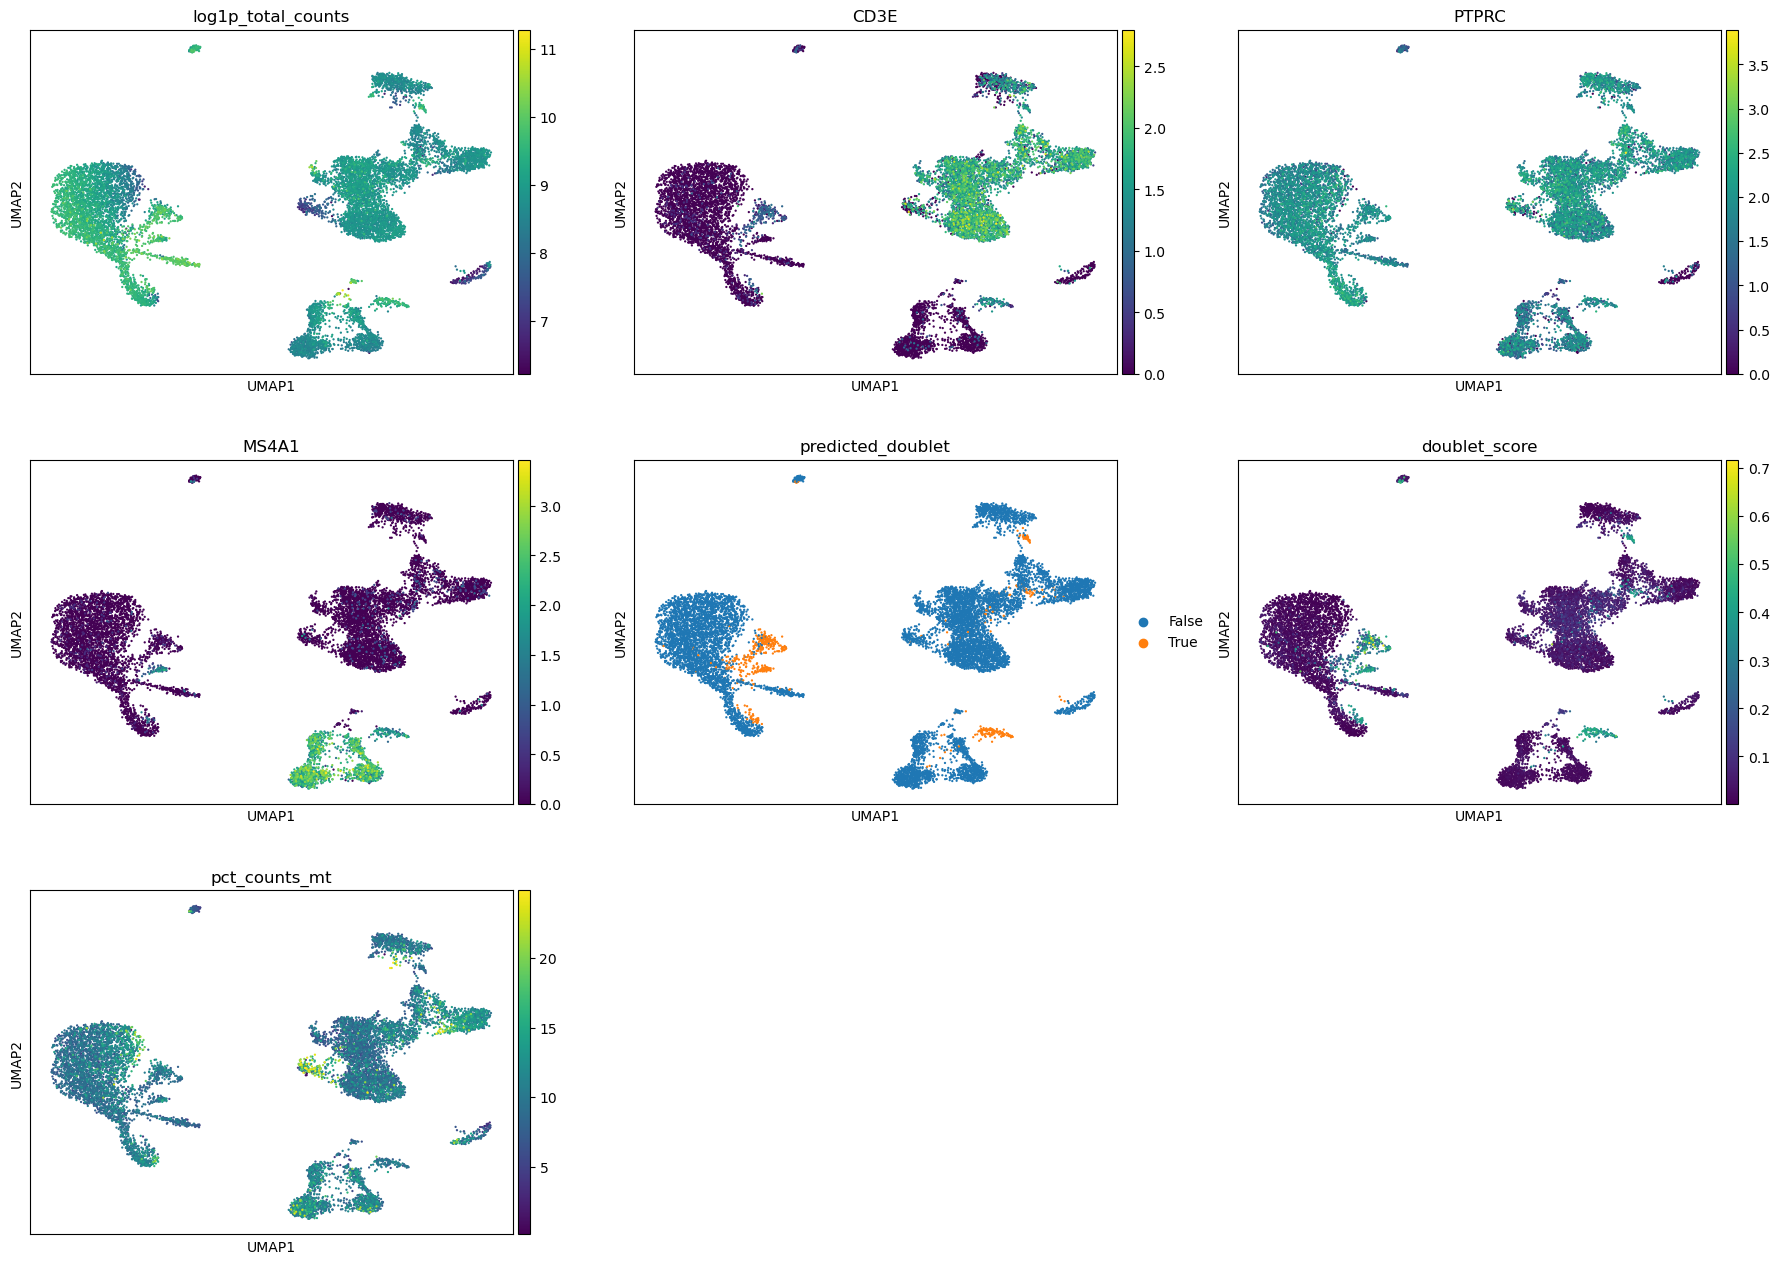

In [48]:
sc.pl.umap(adata, color = ['log1p_total_counts', 'CD3E', 'PTPRC', 'MS4A1', 'predicted_doublet', 'doublet_score', 'pct_counts_mt'], ncols = 3)

To compute UMAP, there are a few parameters at play, importantly: number of principal components and number of nearest neighbors. Let's see how UMAP changes for various values of principal components and nearest neighbors. To evaluate consistency of UMAP to various values of these parameters, we will fix one and vary the other.

A) To begin, fix number of nearest neighbors to 30 and vary number of principal components as [10, 30, 50, 70, 200, 500]. How does the UMAP look for these values? Please comment.

B) Second, fix the number of principal components to 30 and vary the number of nearest neighbors as [10, 20, 30, 40, 50, 100, 200]. How does the UMAP look for these values? Please comment.

Solution provided at the end of this notebook below.

In [49]:
adata_copy

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_data'
    obsp: 'distances', 'connectivities'

Solution to A (you may have alternate solutions):

In [50]:
n_neighs = 30
n_pcs_set = [10, 30, 50, 70, 200, 500]
for n_pcs in n_pcs_set:
    print('Computing ' + str(n_pcs) + ' principal components')
    # Compute pca and store the result in adata_copy.obsm['pca_{npcs}']
    sc.pp.pca(adata_copy, n_comps= n_pcs, mask_var='highly_variable', key_added='pca_' + str(n_pcs))

    # Compute neighbors -> but make sure the use_rep parameter is the correct number of PCs
    sc.pp.neighbors(adata_copy, n_neighbors=n_neighs, use_rep='pca_' + str(n_pcs), key_added = 'neighs_pca_' + str(n_pcs))

    # Compute UMAP -> but make sure the correct neighbors are used in the neighbors_key parameter
    sc.tl.umap(adata_copy, key_added='X_umap_' + str(n_pcs), neighbors_key='neighs_pca_' + str(n_pcs))

Computing 10 principal components
Computing 30 principal components
Computing 50 principal components
Computing 70 principal components
Computing 200 principal components
Computing 500 principal components


In [51]:
adata_copy

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'pca_10', 'neighs_pca_10', 'X_umap_10', 'pca_30', 'neighs_pca_30', 'X_umap_30', 'pca_50', 'neighs_pca_50', 'X_umap_50', 'pca_70', 'neighs_pca_70', 'X_umap_70', 'pca_200', 'neighs_pca_200', 'X_umap_200', 'pca_500', 'neighs_pca_500', 'X_umap_500'
    obsm: 'X_pca', 'X_umap', 'pca_10', 'X_umap_10', 'pca_30', 'X_umap_30', 'pca_5

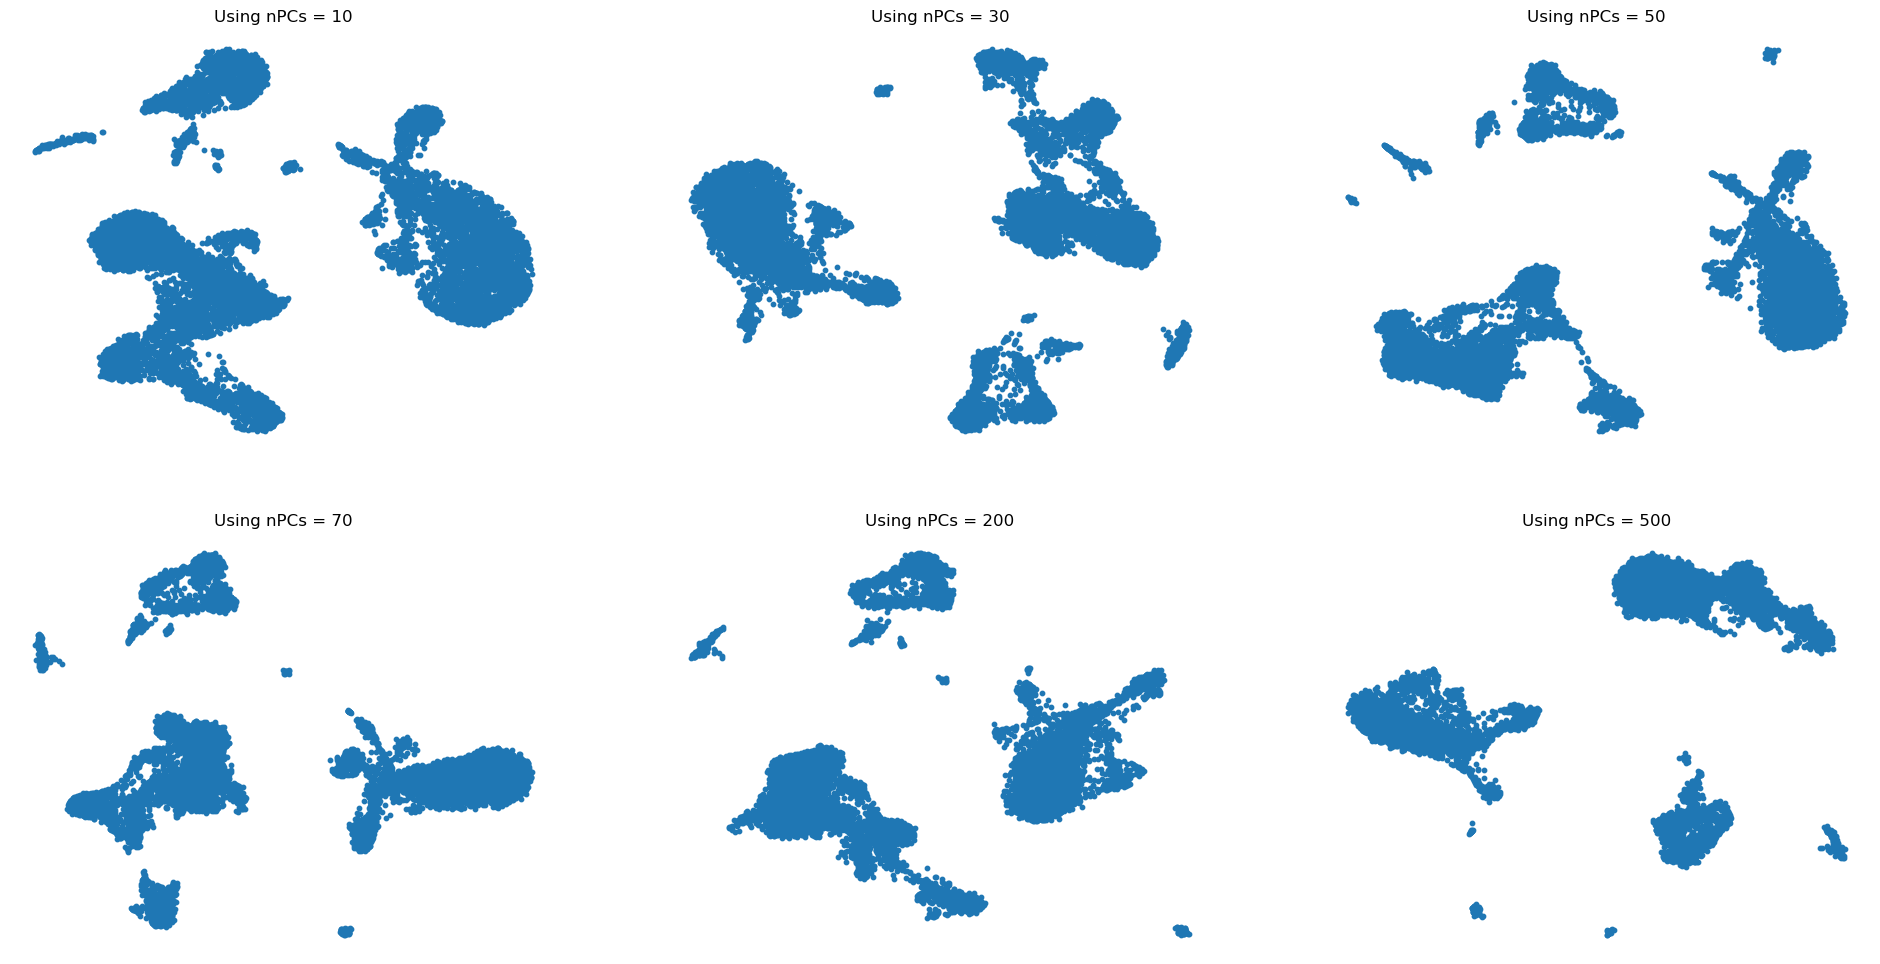

In [52]:
fig = plt.figure(figsize = (8*3, 6*2))
for j, item in enumerate(n_pcs_set):
    ax = fig.add_subplot(2, 3, j+1)
    ax.scatter(adata_copy.obsm['X_umap_' + str(item)][:, 0], adata_copy.obsm['X_umap_' + str(item)][:, 1], s = 10)
    ax.axis('off')
    ax.set_title('Using nPCs = ' + str(item))

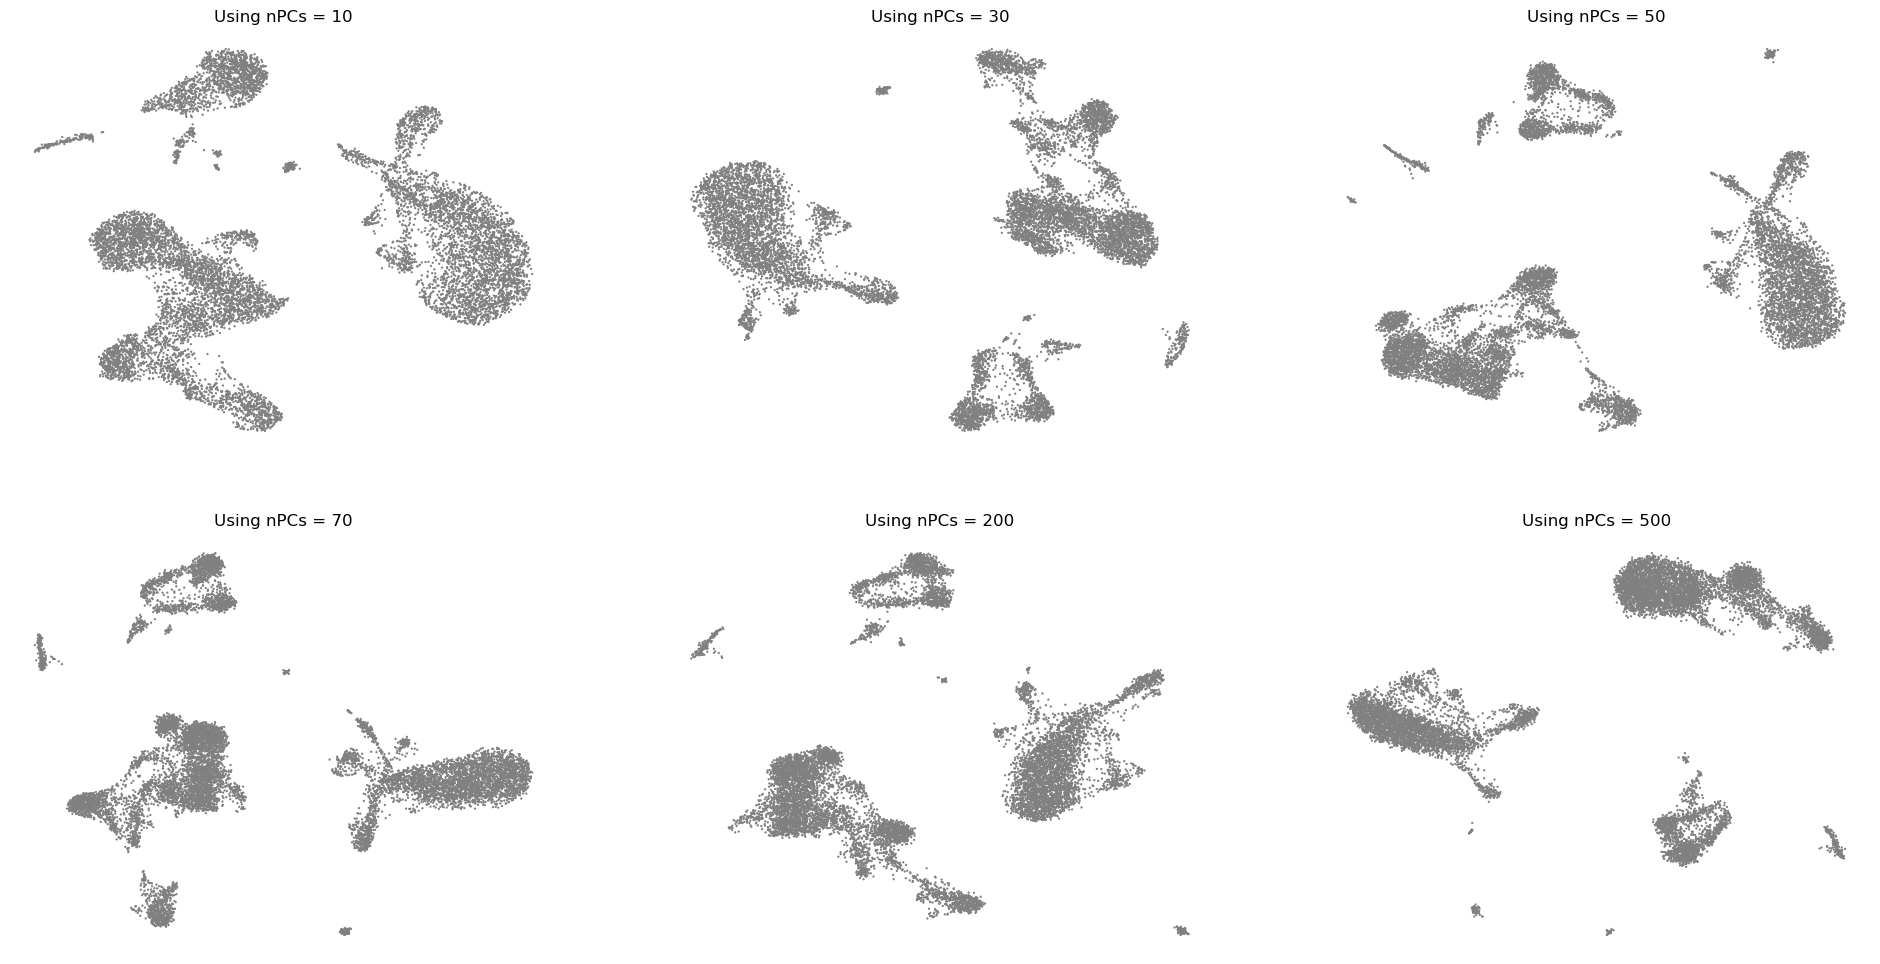

In [53]:
# Alternate visualization approach
fig = plt.figure(figsize = (8*3, 6*2))
for j, item in enumerate(n_pcs_set):
    ax = fig.add_subplot(2, 3, j+1)
    ax.axis('off')
    sc.pl.scatter(adata_copy, basis='umap_' + str(item), ax=ax, show = False, title = 'Using nPCs = ' + str(item))

Solution to B (you may have alternate solutions):

In [54]:
n_pcs = 30
n_neighs_set = [10, 20, 30, 40, 50, 100, 200]

print('Computing ' + str(n_pcs) + ' principal components')
# Compute pca and store the result in adata_copy.obsm['pca_{npcs}']
sc.pp.pca(adata_copy, n_comps= n_pcs, mask_var='highly_variable', key_added='pca_30')

for n_neighs in n_neighs_set:
    print('Computing ' + str(n_neighs) + ' nearest neighbor graph')
    # Compute neighbors -> but make sure the use_rep parameter is correct 
    sc.pp.neighbors(adata_copy, n_neighbors=n_neighs, use_rep='pca_30', key_added = 'neighs_' + str(n_neighs))

    # Compute UMAP -> but make sure the correct neighbors are used in the neighbors_key parameter
    sc.tl.umap(adata_copy, key_added='X_umap_neighs_' + str(n_neighs), neighbors_key='neighs_' + str(n_neighs))

Computing 30 principal components
Computing 10 nearest neighbor graph
Computing 20 nearest neighbor graph
Computing 30 nearest neighbor graph
Computing 40 nearest neighbor graph
Computing 50 nearest neighbor graph
Computing 100 nearest neighbor graph
Computing 200 nearest neighbor graph


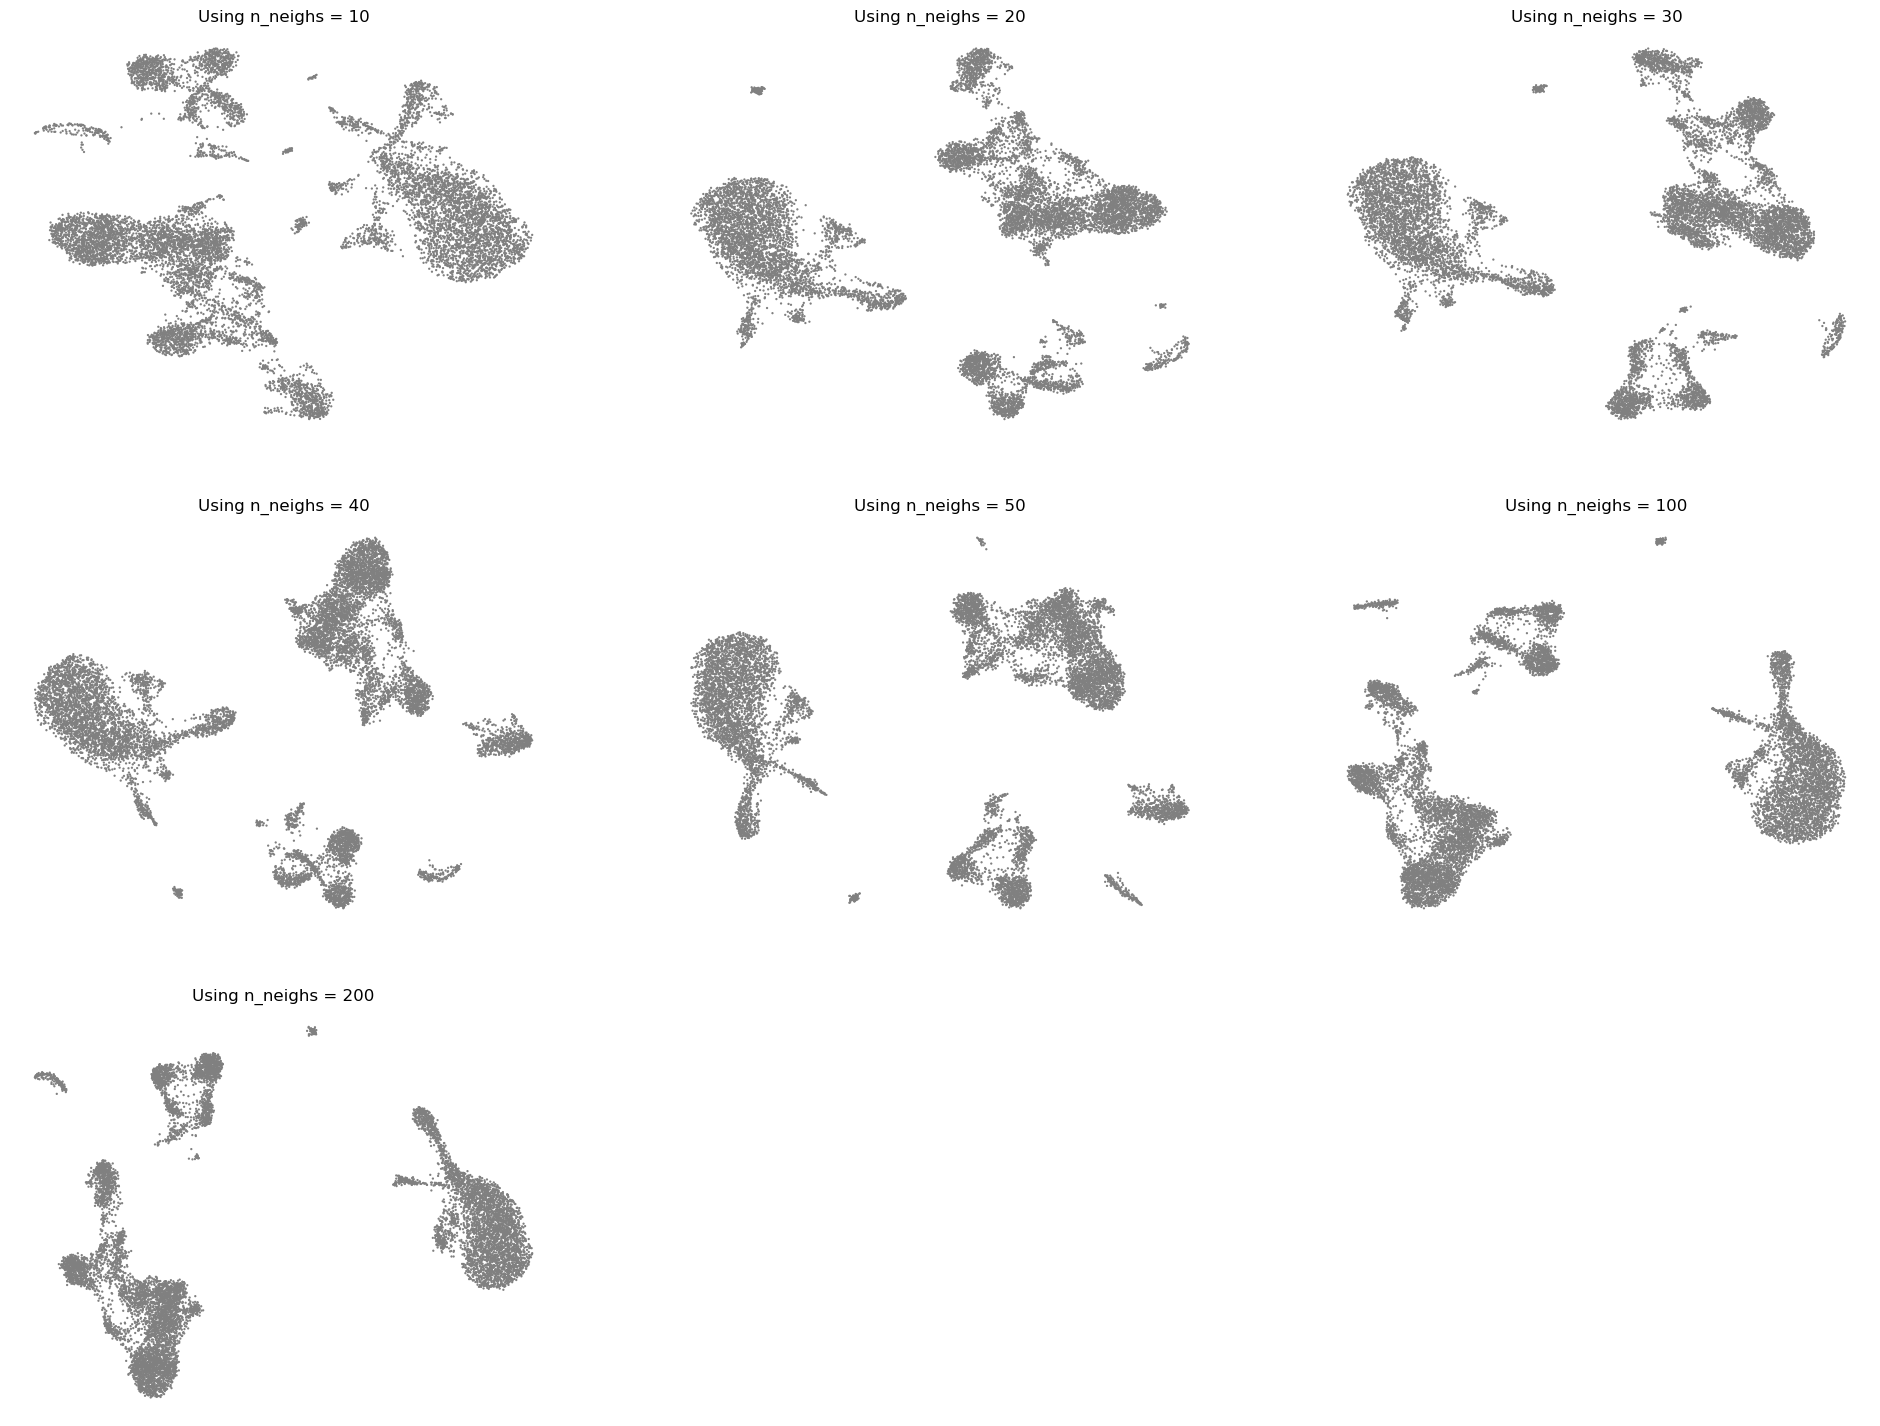

In [55]:
fig = plt.figure(figsize = (8*3, 6*3))
for j, item in enumerate(n_neighs_set):
    ax = fig.add_subplot(3, 3, j+1)
    sc.pl.scatter(adata_copy, basis='umap_neighs_' + str(item), ax=ax, show=False, frameon = False, title = 'Using n_neighs = ' + str(item))